In [1]:
# quick check the observation error from a radstat.nc4 file
# initial built: 2024/07/30
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [2]:
#exps = ['amsua_1', 'bc0_inf', 'bc0_noinf', 'bc1_inf', 'bc1_noinf']
#exps = ['ng_amsua_15', 'ctrl']
#exps = ['ctrl_test3']
#exps=['ctrl_amsua_ch5','only_clr_clr','only_clr_clr_ng']
#exps=['only_clr_clr','only_clr_clr_ng']
#exps=['stats_ctrl', 'stats_ng', 'stats_ng_use_orig']
#exps=['test_ctrl', 'test_pred']
#exps=['ctrl']
#exps=['full_clr_cld', 'full_only_clr','full_obs','full_model','full_sym']
#exps=['full_clr_cld', 'full_obs', 'full_obs_clwnbc_tmp']
#exps=['sc_CTRL', 'sc_amsua_ch1'] # single cycle
#exps = ['sc_CTRL']
#exps=['full_clr_cld_low']
exps=['sc_v2_CTRL', 'sc_v2_full_clr_cld']

instr='amsua'
sat='n15'
#sat='n20'
gesanl='ges'
time='2022073100'

#time='2022070112'

chanl_sens_ng_list=['ng_amsua_1', 'ng_amsua_2', 'ng_amsua_3', 'ng_amsua_4', 'ng_amsua_5', 'ng_amsua_15', \
                    'ng_atms_17', 'ng_atms_18', 'ng_atms_19', 'ng_atms_20', 'ng_atms_21', 'ng_atms_22' ]

#fn  ='diag_amsua_n19_ges.2022070100.nc4'
#fn='diag_atms_n20_ges.2022070100.nc4'

#fn='diag_amsua_n18_ges.2022072000.nc4'
fn=f'diag_{instr}_{sat}_{gesanl}.{time}.nc4'

rr={};
for exp in exps:
    if exp == 'amsua_1': # this directory is used temporarily for validating the code:
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/chanl_sens_ng_{exp}/gdas.20220701/00/atmos/radstat_tmp'
    elif exp == 'bc0_inf':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_old_crtm/old_crtm_bc0_inf/gdas.20220701/00/atmos/radstat_tmp'
    elif exp == 'bc1_inf':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_old_crtm/old_crtm_bc1_inf/gdas.20220701/00/atmos/radstat_tmp'
    elif exp == 'bc0_noinf':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_old_crtm/old_crtm_bc0_noinf/gdas.20220701/00/atmos/radstat_tmp'
    elif exp == 'bc1_noinf':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_old_crtm/old_crtm_bc1_noinf/gdas.20220701/00/atmos/radstat_tmp'
    elif exp in chanl_sens_ng_list :
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/chanl_sens_{exp}/gdas.20220701/00/atmos/radstat_tmp'
    elif exp == 'ctrl':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/{exp}/'
    elif exp == 'ctrl_test':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/ctrl/gdas.20220720/00/atmos/radstat_tmp'
    elif exp == 'ctrl_test2':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/ctrl/gdas.20220720/00/atmos/radstat_tmp2'        
    elif exp == 'ctrl_test3':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/ctrl/gdas.20220720/00/atmos/radstat_tmp3' 
    elif exp == 'ctrl_amsua_ch5':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/ctrl_amsua_ch5/'
    elif exp == 'only_clr_clr':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/only_clr_clr'
    elif exp == 'only_clr_clr_ng':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/only_clr_clr_ng'
    elif exp == 'stats_ctrl':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/ctrl/gdas.20220720/00/atmos/stats_ctrl'
    elif exp == 'stats_ng':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/ctrl/gdas.20220720/00/atmos/stats_ng'
    elif exp == 'stats_ng_use_orig':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/ctrl/gdas.20220720/00/atmos/stats_ng_use_orig_gross_error_check'
    elif exp == 'test_ctrl':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/clr_clr_and_cld_cld_0.05/tmp'
    elif exp == 'test_pred':
        root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/test_varbc_cld_predictor/gdas.20220610/12/atmos/tmp'
    elif exp == 'full_ctrl':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/full_ctrl/'
    elif exp == 'full_only_clr':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/full_only_clr_clr/'        
    elif exp == 'full_clr_cld':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/full_clr_clr_and_cld_cld_0.05/'
    elif exp == 'full_obs':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld/'
    elif exp == 'full_model':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/full_clr_clr_and_cld_cld_0.05_varbcpred_model_cld_nobc/'
    elif exp == 'full_sym':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{instr}/full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc/'
    elif exp == 'tri_pred':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_tri_clwnbc/tmp_radstat/'
    elif exp == 'full_obs_clwnbc_tmp':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_clwnbc/tmp_radstat'
    elif exp == 'sc_CTRL':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/single_cycle_VarBC_sens_exp/varbc_sens_CTRL'
    elif exp == 'sc_v2_CTRL':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/single_cycle_VarBC_sens_exp_v2/varbc_sens_v2_CTRL'
    elif exp == 'sc_v2_full_clr_cld':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/single_cycle_VarBC_sens_exp_v2/varbc_sens_v2_full_clr_cld'

    elif exp == 'sc_amsua_ch1':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/single_cycle_VarBC_sens_exp/varbc_sens_amsua_ch1'
    elif exp == 'full_clr_cld_low':
        root=f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/full_clr_clr_and_cld_cld_0.05_low/gdas.20220612/12/atmos/radstat_tmp'
        
    rr[exp] = nc.Dataset(f"{root}/{fn}")


In [11]:

chn = 5 # channel to be examined
lat_use={}; lon_use={}; obserr_use={}; inv_obserr_use={}; cloud_use={}; clouddiff_use={}; omf_use={}; omfnbc_use={};
lat_all={}; lon_all={}; qc_all={}; cld_rbc_idx_use={}; clw_obs_use={}; clw_model_use={}; clw_model_nobc_use={}; varbc_idx_use={};
bc_cnst_use={}; varbc_idx_use={}; fwater_use={};

Jq_use={}; Jt_use={}; Jql_use={};
pres_use={};
ql_use={};

#norm_omf_use={}; norm_omf_all={};

for exp in exps:
    ch         = rr[exp].variables['Channel_Index'][:]
    lat        = rr[exp].variables['Latitude'][:]
    lon        = rr[exp].variables['Longitude'][:]
    inv_obserr = rr[exp].variables['Inverse_Observation_Error'][:]
    obserr     = rr[exp].variables['Sym_Observation_Error'][:]
    clw_obs    = rr[exp].variables['clw_obs'][:]
    clw_model  = rr[exp].variables['clw_guess_retrieval'][:]
    if 'clw_guess_retrieval' in rr[exp].variables:
        clw_model_nobc = rr[exp].variables['clw_guess_retrieval_nobc'][:]
    if 'VarBC_Data_Control_Index' in rr[exp].variables:
        varbc_idx = rr[exp].variables['VarBC_Data_Control_Index'][:]
        
    if 'Inner_domain_ql' in rr[exp].variables:
        ql = rr[exp].variables['Inner_domain_ql'][:]
        
    if 'Jacobian_Water_Vapor' in rr[exp].variables:
        Jq = rr[exp].variables['Jacobian_Water_Vapor'][:]
        
    if 'Jacobian_Temperature' in rr[exp].variables:
        Jt = rr[exp].variables['Jacobian_Temperature'][:]
        
    if 'Jacobian_ql' in rr[exp].variables:
        Jql = rr[exp].variables['Jacobian_ql'][:]  
        
    if 'Inner_domain_Pressure' in rr[exp].variables:
        pres = rr[exp].variables['Inner_domain_Pressure'][:]
  
        
    omf        = rr[exp].variables['Obs_Minus_Forecast_adjusted'][:]
    omfnbc     = rr[exp].variables['Obs_Minus_Forecast_unadjusted'][:]
    fwater     = rr[exp].variables['Water_Fraction'][:]
    symcloud   = 0.5*(clw_obs + clw_model)
    diffcloud  = (clw_obs - clw_model)
    qc         = rr[exp].variables['QC_Flag'][:]
    bc_cnst    = rr[exp].variables['BC_Constant'][:]
    
    # new added variable: VarBC_Cloud_Consistency_Index (2024/08/22)
    # old nc4 files do not have this variable
    #cld_rbc_idx = rr[exp].variables['Cloud_Displacement_Index'][:]
    #varbc_idx   = rr[exp].variables['VarBC_Data_Control_Index'][:]

    sea_screen  = (fwater>= 0.99)
    #sea_screen  = (fwater< 0.99)
    
    #use          = np.where ( ch==chn )
    #use         = np.where( (ch==chn)&sea_screen )
    #use         = np.where( (qc == 0)&(ch==chn) )
    #use         = np.where( (qc == 0)&(ch==chn)&sea_screen )
    #use         = np.where( (qc == 0)&(ch==chn)&sea_screen&(clw_model>0.3))
    #use         = np.where( (qc == 0)&(ch==chn)&sea_screen&(clw_model<0.05))
    
    use         = np.where( (qc == 0)&(ch==chn)&sea_screen&(varbc_idx==1) )

    
    #use         = np.where( (qc == 0)&(ch==chn))
    #use         = np.where( (ch==chn)&sea_screen )
    #use         = np.where( (qc == 0)&(ch==chn)&(cld_rbc_idx==1))
    #use         = np.where( (qc == 0)&(ch==chn)&(varbc_idx==1))

    lat_use[exp]        = lat[use]
    lon_use[exp]        = lon[use]
    obserr_use[exp]     = obserr[use]
    inv_obserr_use[exp] = inv_obserr[use]
    cloud_use[exp]      = symcloud[use]
    clw_obs_use[exp]    = clw_obs[use]
    clw_model_use[exp]  = clw_model[use]
    fwater_use[exp]     = fwater[use]
    
    if 'clw_guess_retrieval' in rr[exp].variables:      clw_model_nobc_use[exp] = clw_model_nobc[use]
    if 'VarBC_Data_Control_Index' in rr[exp].variables:    varbc_idx_use[exp]   = varbc_idx[use]
    
    if 'Inner_domain_ql' in rr[exp].variables: ql_use[exp] = np.squeeze(ql[use,:])
    if 'Inner_domain_Pressure' in rr[exp].variables: pres_use[exp] = np.squeeze(pres[use,:])
    if 'Jacobian_Water_Vapor' in rr[exp].variables: Jq_use[exp]    = np.squeeze(Jq[use,:])
    if 'Jacobian_Temperature' in rr[exp].variables: Jt_use[exp]    = np.squeeze(Jt[use,:])
    if 'Jacobian_ql' in rr[exp].variables: Jql_use[exp] = np.squeeze(Jql[use,:])
    
    clouddiff_use[exp]  = diffcloud[use]
    omf_use[exp]        = omf[use]
    omfnbc_use[exp]     = omfnbc[use]
    #cld_rbc_idx_use[exp] = cld_rbc_idx[use]
    bc_cnst_use[exp]     = bc_cnst[0]
        
    qc_all[exp]         = qc[np.where(ch==chn)]
    lat_all[exp]        = lat[np.where(ch==chn)]
    lon_all[exp]        = lon[np.where(ch==chn)]

In [15]:
omf_use[exps[1]].shape

(4132,)

In [16]:
# Example lists
lat1 = [10, 20, 30, 40, 50]
lat2 = [30, 50, 70, 90]

# Find common elements
common_elements = np.intersect1d(lat1, lat2)

# Get indices in lat1 and lat2
indices_lat1 = [np.where(np.array(lat1) == value)[0][0] for value in common_elements]
indices_lat2 = [np.where(np.array(lat2) == value)[0][0] for value in common_elements]

print("Common elements:", common_elements)
print("Indices in lat1:", indices_lat1)
print("Indices in lat2:", indices_lat2)

Common elements: [30 50]
Indices in lat1: [2, 4]
Indices in lat2: [0, 1]


In [ ]:
# take the common obs data point:


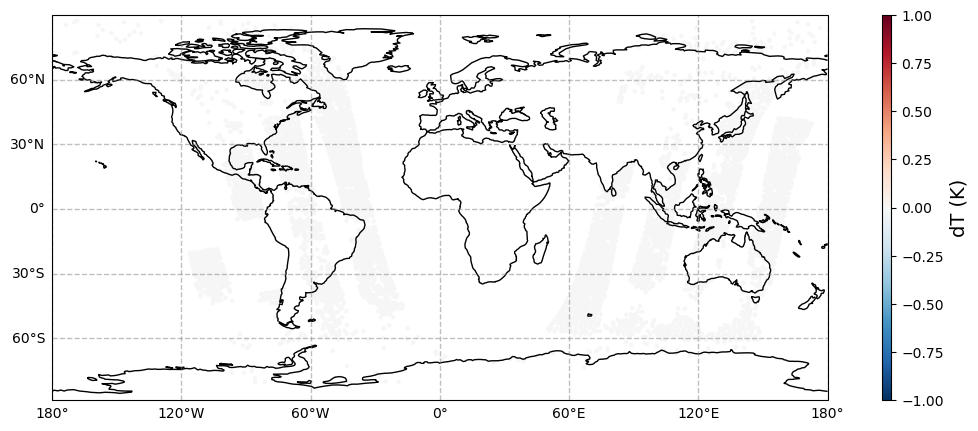

In [10]:
# check the VarBC impact
exptest = exps[1]
expref  = exps[0]


fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lon_use[expref], lat_use[expref], c=omf_use[expref] - omf_use[exptest], s=5, vmin=-1, vmax=1, cmap='RdBu_r')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{chn} {gesanl} {time}')
cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label('dT (K)', fontsize=14)

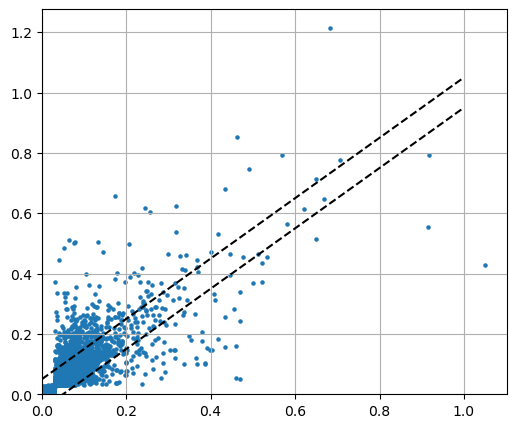

In [12]:
# check varbc idx:

expref = 'sc_v2_CTRL'

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(clw_model_use[expref], clw_obs_use[expref], s=5)
ax.plot([0,1],[-0.05, 0.95], linestyle = '--', color='black')
ax.plot([0,1],[ 0.05, 1.05], linestyle = '--', color='black')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.grid(True)

In [11]:
len(omf_use['sc_CTRL'])

3040

Text(0.5, 1.0, 'lat = -47.5, lon = 26.3, model cloud = 0.08, fwater = 1.00')

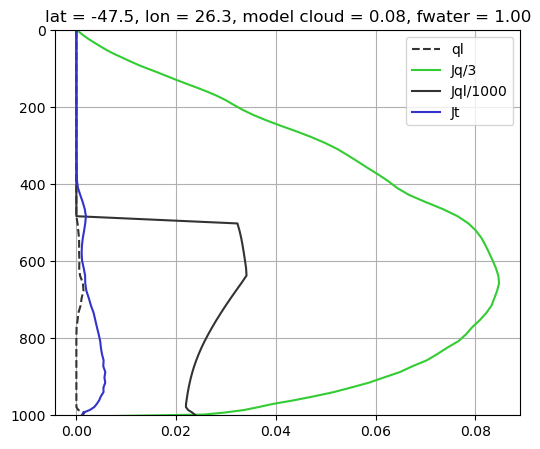

In [11]:
# 2025/02/05: single-cycle varbc sensitivity test - examine the Jacobian:
expref = 'sc_CTRL'

ii=11

fig, ax = plt.subplots(figsize=(6,5))
#fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax.plot(ql_use[expref][ii,:], pres_use[expref][ii,:], color=(0.2,0.2,0.2), linestyle='--',   label='ql')
ax.plot(Jq_use[expref][ii,:]/3, pres_use[expref][ii,:], color=(0.2,0.8,0.2), linestyle='-',  label='Jq/3')
ax.plot(Jql_use[expref][ii,:]/1000, pres_use[expref][ii,:], color=(0.2,0.2,0.2), linestyle='-',  label='Jql/1000')
ax.plot(Jt_use[expref][ii,:], pres_use[expref][ii,:], color=(0.2,0.2,0.8), linestyle='-',  label='Jt')
ax.legend()
ax.grid(True)
ax.set_ylim(1000,0)
ax.set_title(f'lat = {lat_use[expref][ii]:.1f}, lon = {lon_use[expref][ii]:.1f}, model cloud = {clw_model_use[expref][ii]:.2f}, fwater = {fwater_use[expref][ii]:.2f}')

# of profiles = 3040


(1000.0, 0.0)

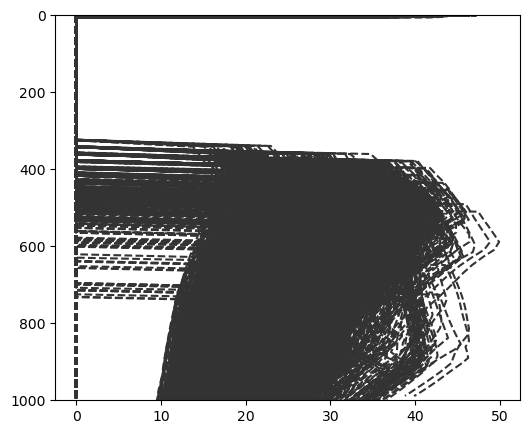

In [12]:
# 2025/02/05: single-cycle varbc sensitivity test - examine the Jacobian:
expref = 'sc_CTRL'
print(f'# of profiles = {len(omf_use[expref])}')

fig, ax = plt.subplots(figsize=(6,5))
for ii in range(len(omf_use[expref])):
    ax.plot(Jql_use[expref][ii,:], pres_use[expref][ii,:], color=(0.2,0.2,0.2), linestyle='--')
    #ax.plot(Jt_use[expref][ii,:], pres_use[expref][ii,:], color=(0.2,0.2,0.2), linestyle='--')

ax.set_ylim(1000,0)

In [13]:
# 2025/02/05: single-cycle varbc sensitivity test
expref  = 'sc_CTRL'
exptest = 'sc_amsua_ch1' 

lat1 = lat_use[expref]
lat2 = lat_use[exptest]

# Find common elements
common_elements, lat1_indices, lat2_indices = np.intersect1d(lat1, lat2, return_indices=True)
'''
print("Common elements:", common_elements)
print("Indices in lat1:", lat1_indices)
print("Indices in lat2:", lat2_indices)
'''
lat_com = lat_use[expref][lat1_indices]
lon_com = lon_use[expref][lat1_indices]
omf_ref  = omf_use[expref][lat1_indices]
omf_test = omf_use[exptest][lat2_indices]

KeyError: 'sc_amsua_ch1'

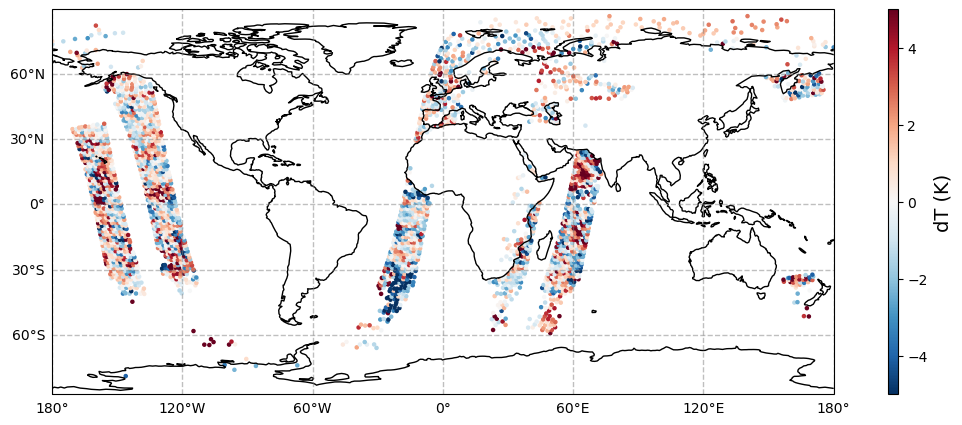

In [16]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
#scatter1 = ax.scatter(lon_com, lat_com, c=omf_ref - omf_test, s=5,  vmin=-0.5, vmax=0.5, cmap='RdBu_r')
scatter1 = ax.scatter(lon_use[expref], lat_use[expref], c=omf_use[expref], s=5, vmin=-5, vmax=5, cmap='RdBu_r')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
#ax.set_title(f'{exptest} -  {expref}  {instr}-{sat} channel-{chn} {gesanl} {time}')
cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label('dT (K)', fontsize=14)

(array([ 61., 146., 299., 463., 576., 506., 310., 229., 116.,  25.]),
 array([-0.53270876, -0.5201019 , -0.50749505, -0.49488816, -0.48228127,
        -0.46967441, -0.45706755, -0.44446066, -0.4318538 , -0.41924691,
        -0.40664005]),
 <BarContainer object of 10 artists>)

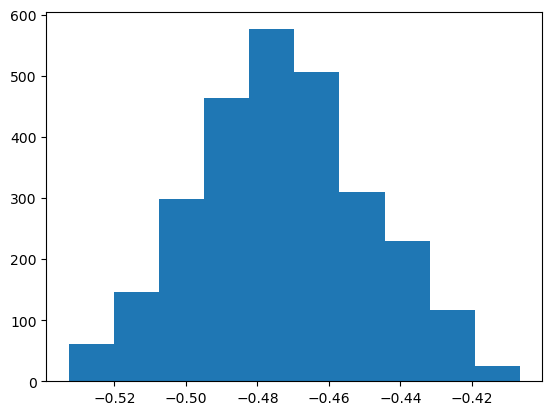

In [99]:
plt.hist(omf_ref - omf_test)

In [6]:
# 2024/12/26: check varbc idx
expref = 'tri_pred'
varbc_use = np.where(varbc_idx_use[expref]==1)

model_cloud = clw_model_nobc_use[expref][varbc_use]
obs_cloud   = clw_obs_use[expref][varbc_use]
#plt.scatter(model_cloud, obs_cloud)

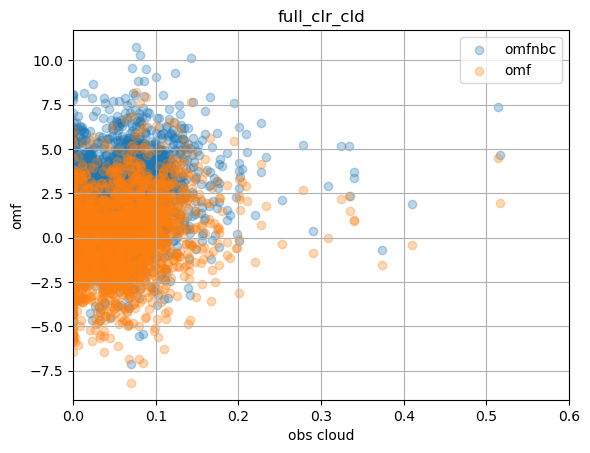

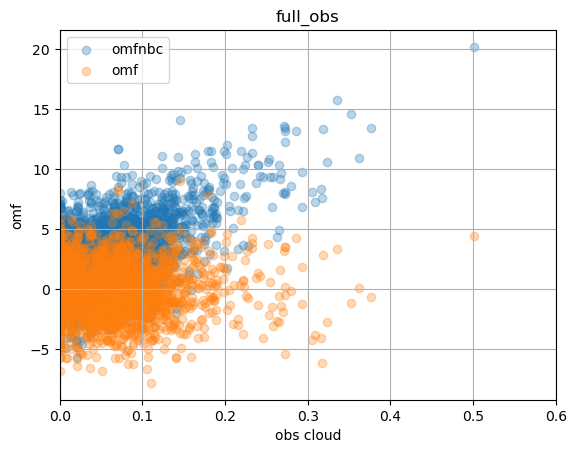

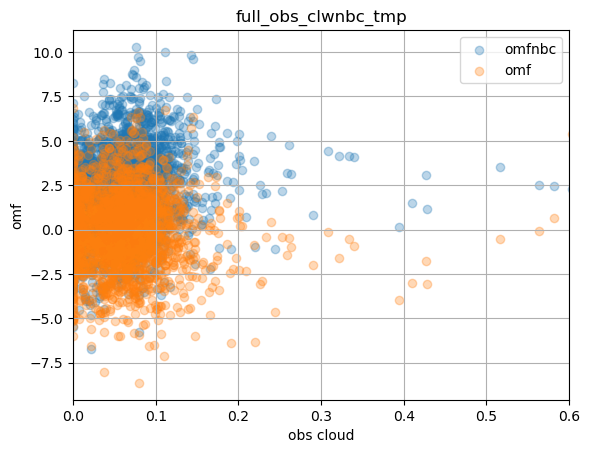

In [47]:
#varbc_inc = omfnbc_use[expref] - omf_use[expref]
for exp in exps:
    plt.scatter(clw_obs_use[exp], omfnbc_use[exp], alpha=0.3, label='omfnbc')
    plt.scatter(clw_obs_use[exp], omf_use[exp], alpha=0.3, label='omf')
    plt.xlabel('obs cloud')
    plt.ylabel('omf')
    plt.xlim(0,0.6)
    plt.grid(True)
    plt.title(f'{exp}')
    plt.legend()
    plt.show()

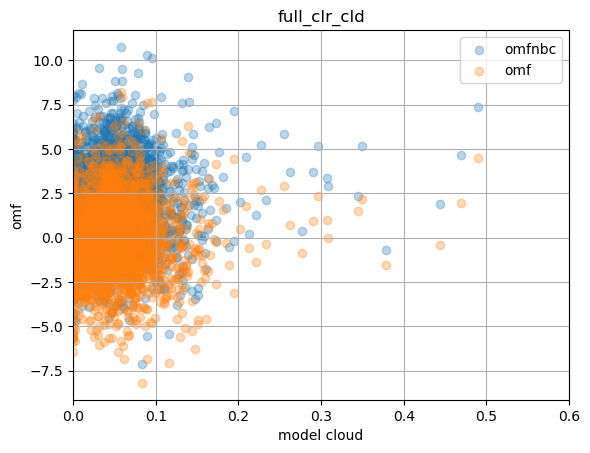

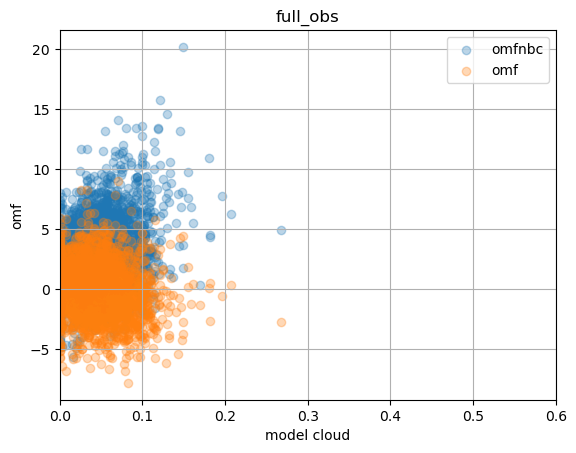

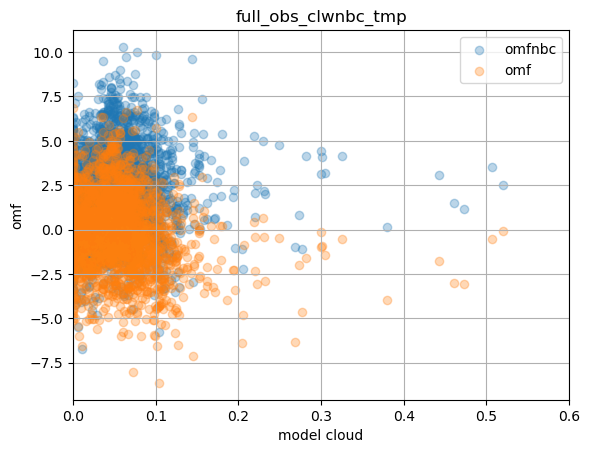

In [48]:
for exp in exps:
    plt.scatter(clw_model_nobc_use[exp], omfnbc_use[exp], alpha=0.3, label='omfnbc')
    plt.scatter(clw_model_nobc_use[exp], omf_use[exp], alpha=0.3, label='omf')
    plt.xlabel('model cloud')
    plt.ylabel('omf')
    plt.xlim(0,0.6)
    plt.title(f'{exp}')
    plt.grid(True)
    plt.legend()
    plt.show()

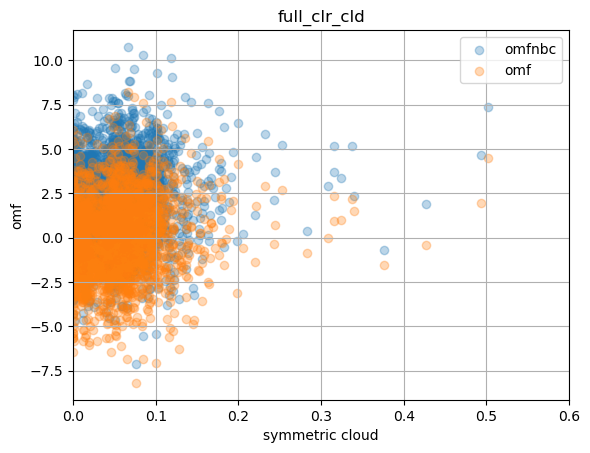

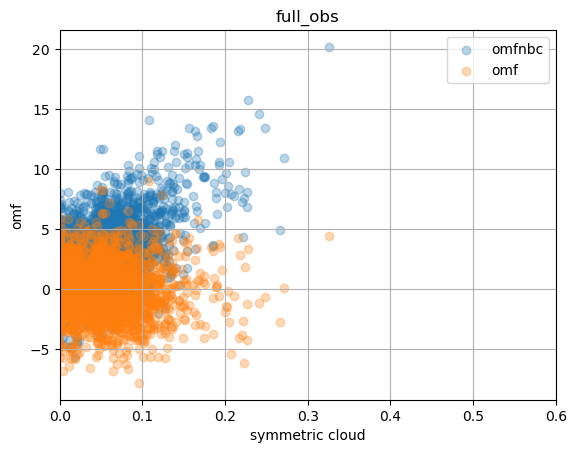

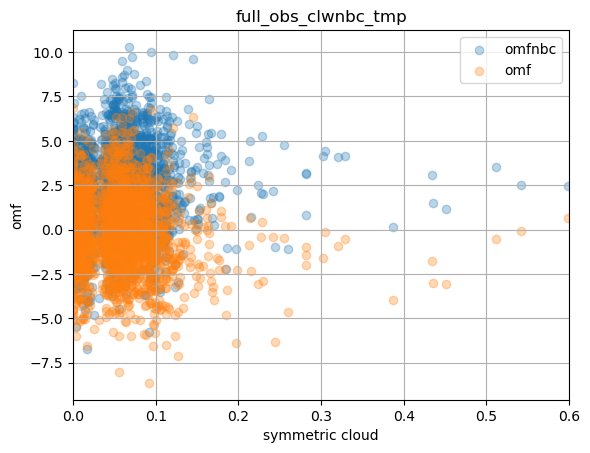

In [50]:

for exp in exps:
    symcloud = 0.5*(clw_model_nobc_use[exp] + clw_obs_use[exp])
    plt.scatter(symcloud, omfnbc_use[exp], alpha=0.3, label='omfnbc')
    plt.scatter(symcloud, omf_use[exp], alpha=0.3, label='omf')
    plt.xlabel('symmetric cloud')
    plt.ylabel('omf')
    plt.xlim(0,0.6)
    plt.grid(True)
    plt.title(f'{exp}')
    plt.legend()
    plt.show()

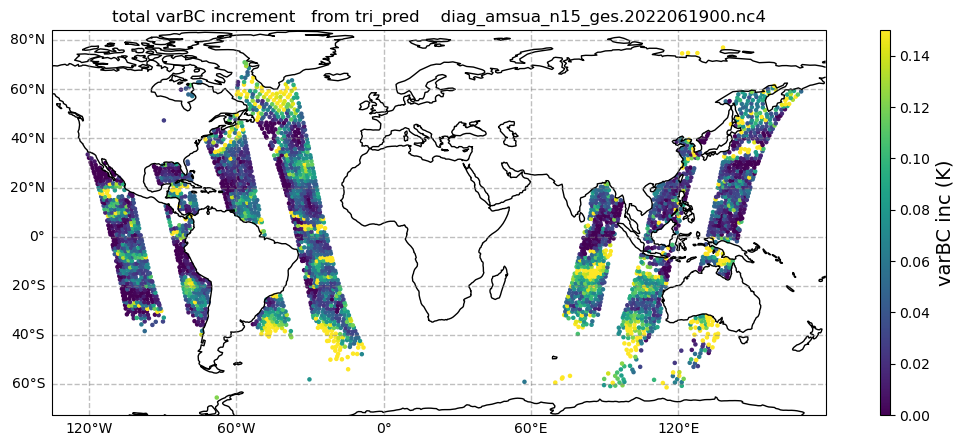

In [8]:
# 2024/12/20
# look at the observation cloud distribution 
#expref = 'full_clr_cld'
expref = 'tri_pred'

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lon_use[expref], lat_use[expref], c=clw_obs_use[expref], s=5,  vmin=0, vmax=0.15, cmap='viridis')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'total varBC increment   from {exp}    {fn}')
cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label('varBC inc (K)', fontsize=14)

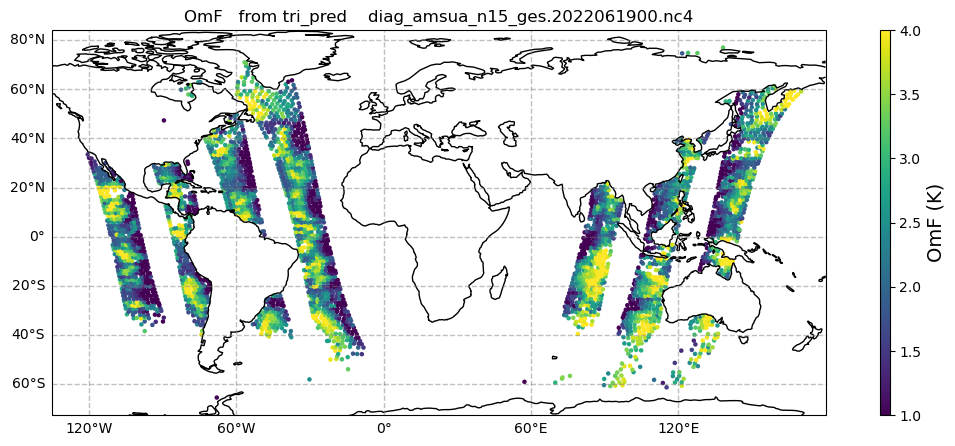

In [14]:
# 2024/12/20

for i, exp in enumerate(exps):
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())

    ax.coastlines()
    #scatter1 = ax.scatter(lon_use[exp], lat_use[exp], c=clw_model_use[exp]-clw_model_nobc_use[exp], s=5, vmin=-0.1, vmax=0.1, cmap='RdBu_r')
    #scatter1 = ax.scatter(lon_use[exp], lat_use[exp], c=omf_use[exp], s=5,  vmin=-10, vmax=10, cmap='RdBu_r')
    #scatter1 = ax.scatter(lon_use[exp], lat_use[exp], c=omfnbc_use[exp], s=5,  vmin=-8, vmax=12, cmap='RdBu_r')
    scatter1 = ax.scatter(lon_use[exp], lat_use[exp], c=omfnbc_use[exp]-omf_use[exp], s=5, vmin=1, vmax=4, cmap='viridis')

    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'OmF   from {exp}    {fn}')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('OmF (K)', fontsize=14)

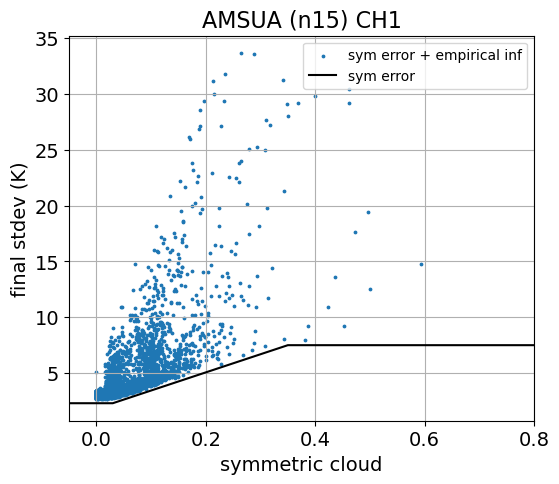

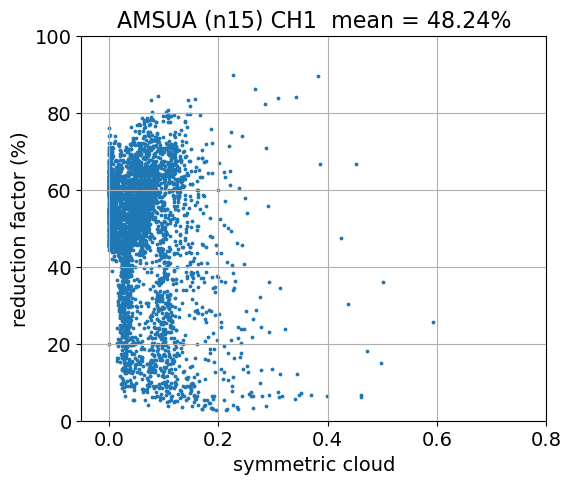

In [47]:
# plotted: 2024/09/11
# dont' change!!
# plot ctrl // diag_amsua_n15_ges.2022070100.nc4 channel 1 // symmetric error vs final error

exptest='ctrl'

def sym_err(cloud):
    if cloud <=0.03:
        pred_stdev = 2.3
    elif (cloud > 0.03) & (cloud <= 0.35):
        pred_stdev = 2.3 + (cloud-0.03)*(7.5-2.3)/(0.35-0.03)
    else:
        pred_stdev = 7.5
    return pred_stdev

xx = [-0.1, 0.03, 0.35, 1.1]
yy = []
for x in xx:
    yy.append(sym_err(x))

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(cloud_use[exptest],   1/inv_obserr_use[exptest],  s=3, label='sym error + empirical inf')
plt.plot(xx,yy, color='black', label='sym error')
ax.set_xlim(-0.1, 1.1)
ax.set_xlabel('symmetric cloud',fontsize=14)
ax.set_ylabel('final stdev (K)',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='best')
ax.grid(True)
ax.set_xlim(-0.05, 0.8)
ax.set_title(f'AMSUA (n15) CH1', fontsize=16)
plt.savefig(f'amsua_n15_ch1_symerr_vs_finalerr.png', dpi=200, bbox_inches='tight')


# Plot the weight reduction factor:

weight_reduction_fac = obserr_use[exptest]**2 *inv_obserr_use[exptest]**2 *100

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(cloud_use[exptest],   weight_reduction_fac,  s=3)
ax.set_xlim(-0.1, 1.1)
ax.set_xlabel('symmetric cloud',fontsize=14)
ax.set_ylabel('reduction factor (%)',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True)
ax.set_xlim(-0.05, 0.8)
ax.set_ylim(0,100)
ax.set_title(f'AMSUA (n15) CH1  mean = {np.mean(weight_reduction_fac):.2f}%', fontsize=16)
plt.savefig(f'amsua_n15_ch1_weight_reduction_fac.png', dpi=200, bbox_inches='tight')


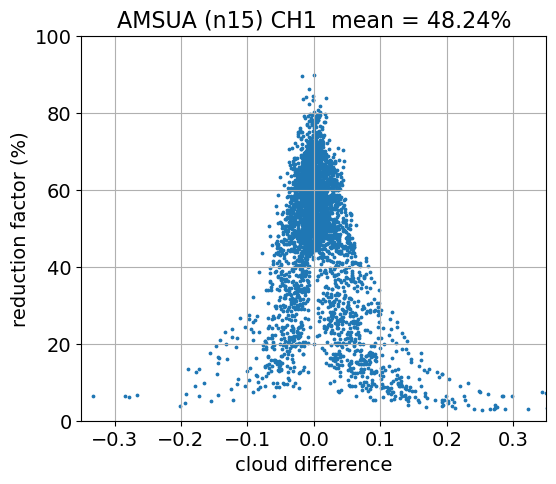

In [10]:
# Plot the weight reduction factor:
exptest='ctrl'

weight_reduction_fac = obserr_use[exptest]**2 *inv_obserr_use[exptest]**2 *100

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(clouddiff_use[exptest],   weight_reduction_fac,  s=3)
ax.set_xlabel('cloud difference',fontsize=14)
ax.set_ylabel('reduction factor (%)',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True)
ax.set_xlim(-0.35, 0.35)
ax.set_ylim(0,100)
ax.set_title(f'AMSUA (n15) CH1  mean = {np.mean(weight_reduction_fac):.2f}%', fontsize=16)
plt.savefig(f'amsua_n15_ch1_weight_reduction_fac_cloud_diff.png', dpi=200, bbox_inches='tight')


In [74]:
sum(cld_rbc_idx_use[exp0])
sum(varbc_idx_use[exp0])

3654.0

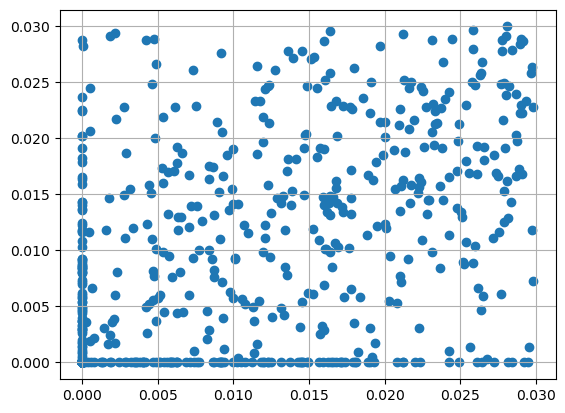

In [8]:
exp0=exps[1]
plt.scatter(clw_obs_use[exp0], clw_model_use[exp0])
#plt.scatter(clw_model_use[exp0], clw_obs_use[exp0]-clw_model_use[exp0])
plt.grid(True)

Text(0.5, 1.0, 'diag_amsua_n19_ges.2022071000.nc4  channel 1')

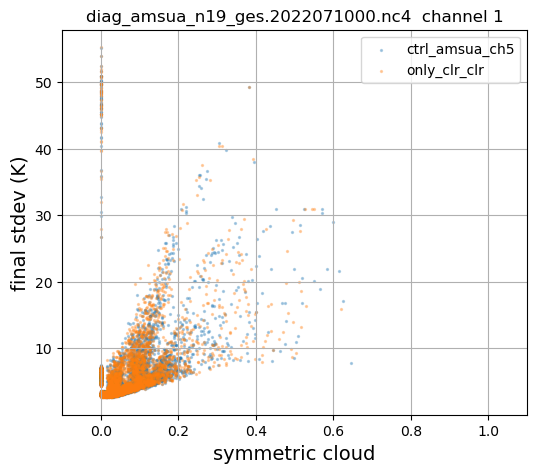

In [33]:
# the scatter plot of symmetric cloud vs final obs error standard deviation

exp1 = exps[0]
exp2 = exps[1]


fig, ax = plt.subplots(figsize=(6,5))

ax.scatter(cloud_use[exp1],   1/inv_obserr_use[exp1],  alpha=0.3, s=2, label=f'{exp1}')
ax.scatter(cloud_use[exp2],   1/inv_obserr_use[exp2],  alpha=0.3, s=2,  label=f'{exp2}')

ax.set_xlim(-0.1, 1.1)
ax.set_xlabel('symmetric cloud',fontsize=14)
ax.set_ylabel('final stdev (K)',fontsize=14)
ax.legend(loc='best')
ax.grid(True)
ax.set_title(f'{fn}  channel {chn}')

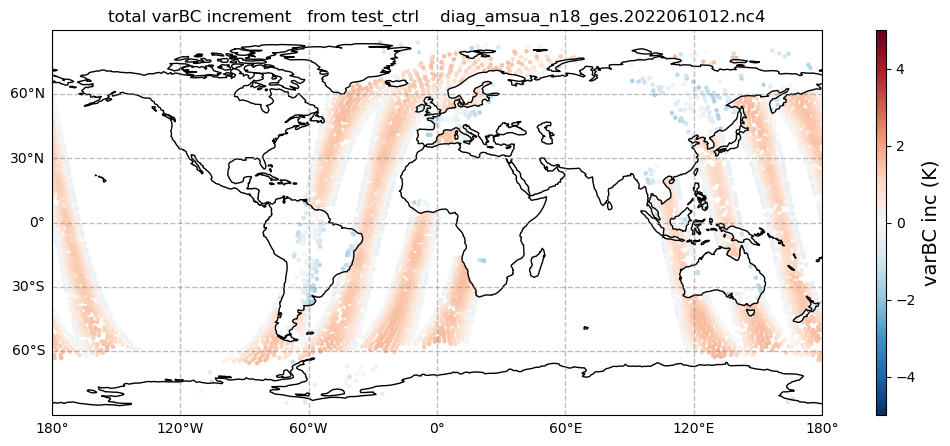

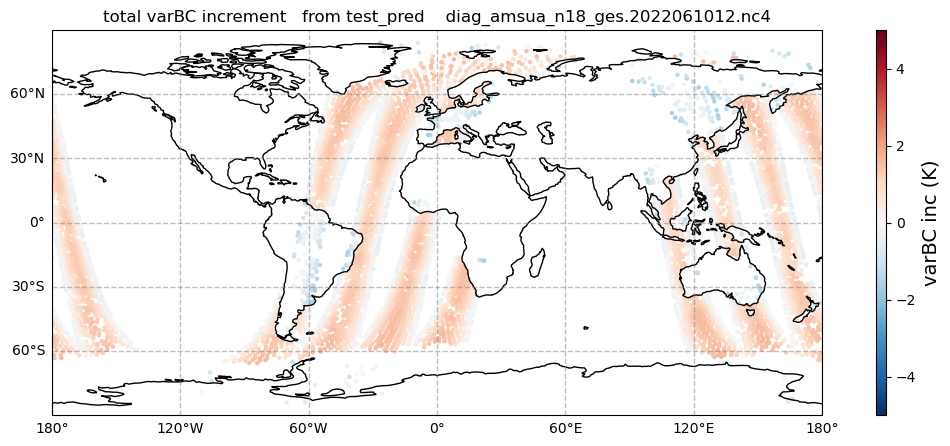

In [4]:
# total VarBC increment:

for i, exp in enumerate(exps):
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())

    ax.coastlines()
    scatter1 = ax.scatter(lon_use[exp], lat_use[exp], c=omfnbc_use[exp]-omf_use[exp], s=5, vmin=-5, vmax=5, cmap='RdBu_r')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'total varBC increment   from {exp}    {fn}')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('varBC inc (K)', fontsize=14)

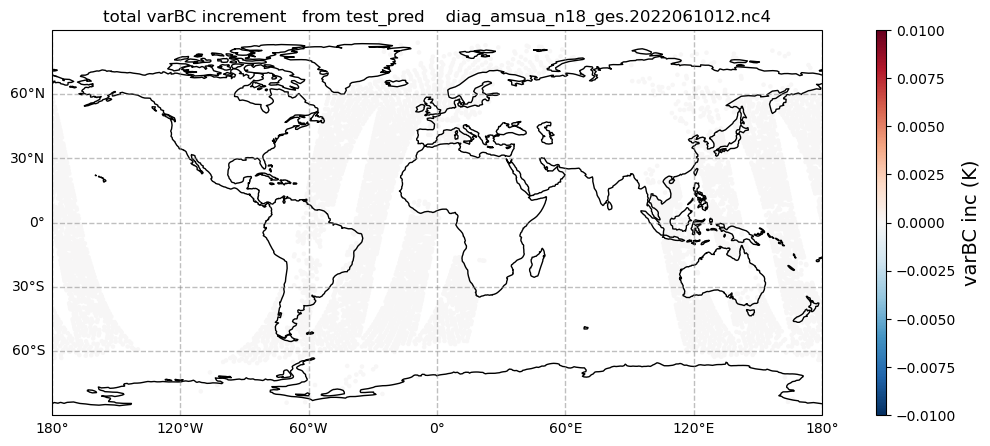

In [9]:
# VarBC increment difference:

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lon_use[exp], lat_use[exp], c=(omfnbc_use['test_ctrl']-omf_use['test_ctrl']) - \
                                                    (omfnbc_use['test_pred']-omf_use['test_pred']), s=5, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'total varBC increment   from {exp}    {fn}')
cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label('varBC inc (K)', fontsize=14)

In [6]:
# check how many obs pass QC:
for exp in exps:
    print(f' number of obs pass QC in {exp} = {np.sum(qc_all[exp] ==0)} ')

 number of obs pass QC in test_ctrl = 5607 
 number of obs pass QC in test_pred = 5607 


In [7]:
# check the histogram of (O-F)/symmetric error:
bin_width = 0.5
bins= np.arange(-15, 25 + bin_width, bin_width)

freq={};
for exp in exps:
    freq[exp], _ = np.histogram(omf_use[exp], bins=bins)

plt.plot(0.5*(bins[:-1] + bins[1:]), freq['stats_ng'] - freq['stats_ctrl'], label='ng-ctrl')
plt.plot(0.5*(bins[:-1] + bins[1:]), freq['stats_ng_use_orig'] - freq['stats_ctrl'], label='ng_orig-ctrl')
plt.xlabel('omf')
plt.ylabel('change in frequency')
plt.legend()


KeyError: 'stats_ng'

In [37]:
sum(freq['stats_ng']) - sum(freq['stats_ctrl'])

187

In [5]:
exp0 = exps[0]
print('# assimilated obs =', len(use[0]))
print('# of 1 in cld_rbc_idx =',       sum(cld_rbc_idx_use[exp0]))
print('# of 1 in cld_rbc_idx_varbc =', sum(varbc_idx_use[exp0]))

for exp in exps:
    print(f'{exp} bc global offset = {bc_cnst_use[exp]}')

# assimilated obs = 5607
# of 1 in cld_rbc_idx = 4913.0


KeyError: 'test_ctrl'

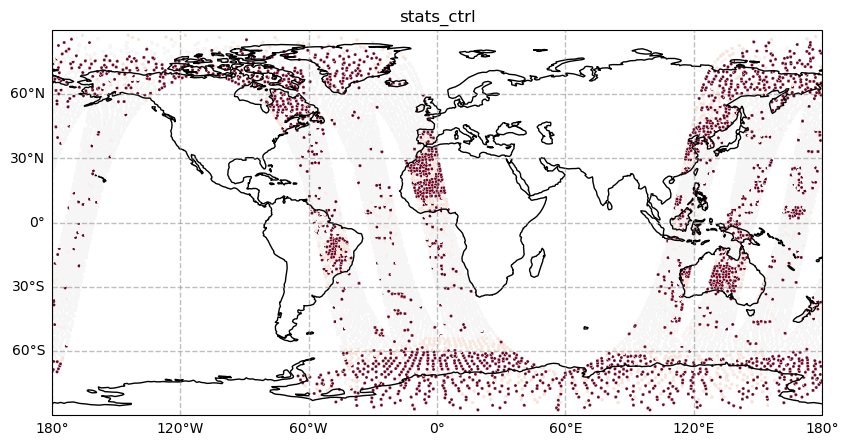

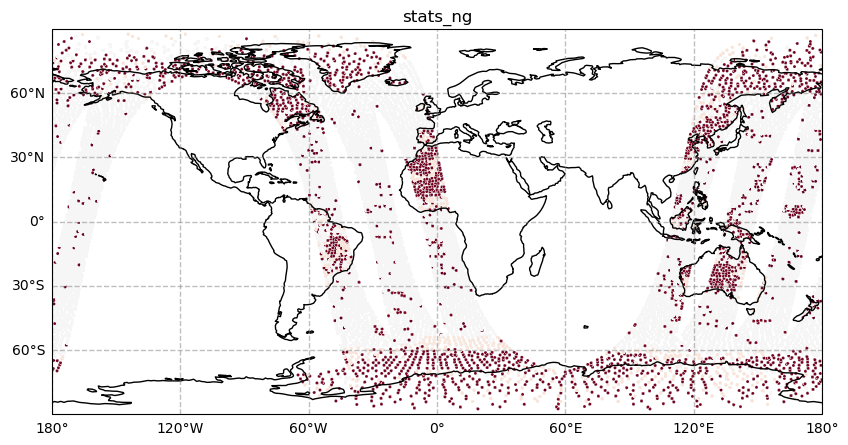

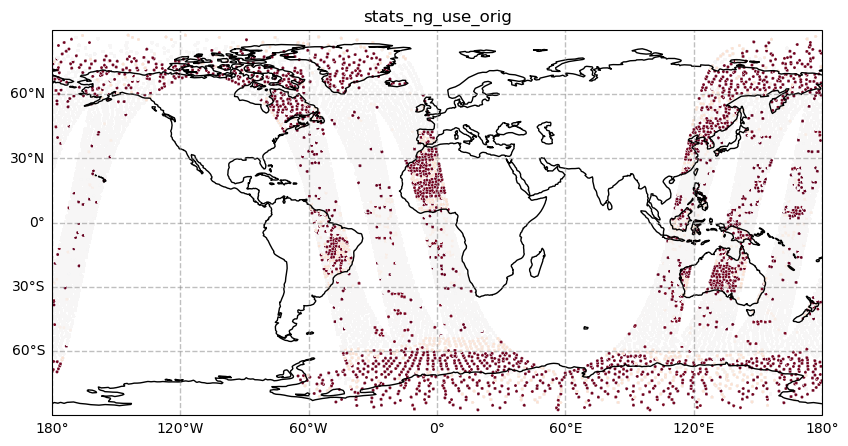

In [5]:
# check the QC flag

exp1 = exps[0]
exp2 = exps[1]
exp3 = exps[2]

for expp in (exp1, exp2, exp3):
    fig = plt.figure(figsize=(14,5))

    # define the subplots
    ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL
    ax.coastlines()
    plt_vars = qc_all[expp]

    ax.scatter(lon_all[expp], lat_all[expp], s=1, c=plt_vars, cmap='RdBu_r')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude') 
    ax.set_title(f'{expp}')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side

In [6]:
sum(abs(qc_all['bc0_inf'] - qc_all['bc0_noinf']))

0.0

"\nfor expp in (exp1, exp2):\n    fig = plt.figure(figsize=(14,5))\n\n    # define the subplots\n    ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1\n\n    # ax1: CTRL\n    ax.coastlines()\n    plt_vars = 1/inv_obserr_use[expp]\n\n    ax.scatter(lon_use[expp], lat_use[expp], s=1, c=plt_vars, cmap='RdBu_r')\n    ax.set_xlabel('longitude')\n    ax.set_ylabel('latitude') \n    ax.set_title(f'{expp}')\n    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')\n    gl.top_labels = False  # Hide labels on the top side\n    gl.right_labels = False  # Hide labels on the right side\n"

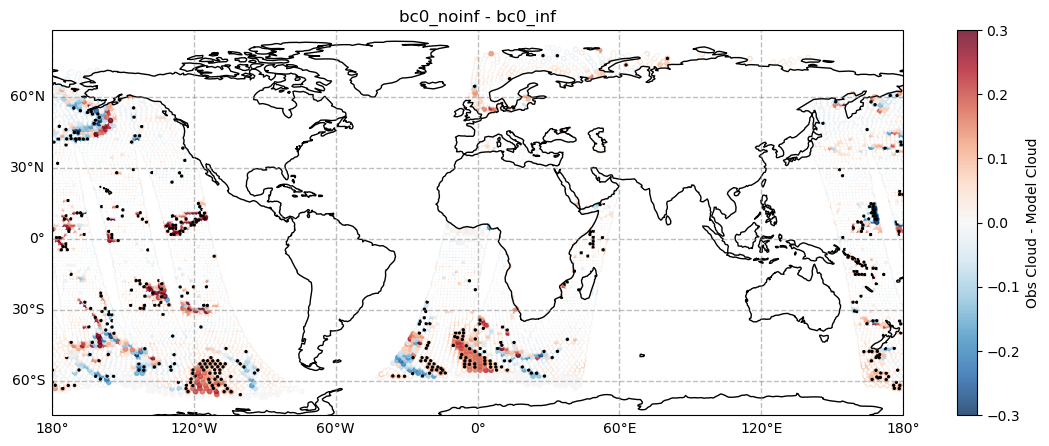

In [84]:
# spatial map for the final observation error standard deviation

exp1 = exps[1]
exp2 = exps[2]

std_diff_cri = 3

fig = plt.figure(figsize=(14,5))

# define the subplots
ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

# ax1: CTRL
ax.coastlines()

plt_var_1 = clouddiff_use[exp1] # cloud mismatch

std_diff = (1/inv_obserr_use[exp2] - 1/inv_obserr_use[exp1]) # stdev difference
plt_var_2 = np.zeros_like(std_diff)
plt_var_2 [abs(std_diff) > std_diff_cri ] = 1

sc1 = ax.scatter(lon_use[exp1], lat_use[exp1], s=10, alpha=0.8, c=plt_var_1, cmap='RdBu_r',  vmin=-0.3, vmax=0.3)
sc2 = ax.scatter(lon_use[exp1], lat_use[exp1], s=2,  alpha=1.0, c=plt_var_2, cmap='Greys',   vmin=0, vmax=1)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude') 
ax.set_title(f'{exp2} - {exp1}')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side

cbar = plt.colorbar(sc1, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Obs Cloud - Model Cloud')

plt.savefig(f"SDOEI_inflation_amount_vs_cloud_mismatch_map_{exp2}_minus_{exp1}.png")


'''
for expp in (exp1, exp2):
    fig = plt.figure(figsize=(14,5))

    # define the subplots
    ax = fig.add_subplot(projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL
    ax.coastlines()
    plt_vars = 1/inv_obserr_use[expp]

    ax.scatter(lon_use[expp], lat_use[expp], s=1, c=plt_vars, cmap='RdBu_r')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude') 
    ax.set_title(f'{expp}')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
'''

In [36]:
len(qc_all['bc0_inf'])

246004

In [37]:
len(qc_all['bc0_noinf'])

246004

0.0